# Titanic App

![img](static/images/small_titanic.jpg)

¿Sobreviviria tu pasajero?

**librerias**

In [1]:
import warnings
warnings.simplefilter('ignore')

import pylab as plt

import pandas as pd
import numpy as np

**datos**

[fuente](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

Incluyen caracteristicas como edad, numero de ticket, cabina, etc..

El objetivo es clasificar-predecir la supervivencia.

In [2]:
df=pd.read_excel('data/titanic.xls')

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**exploracion**

In [3]:
df.shape

(1309, 14)

In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 587.7 KB


In [6]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**preparando datos**

In [8]:
# tratando los NaN

# letra de la cabina
df.cabin=df.cabin.replace(np.NaN, 'U') 
df.cabin=[e[0] for e in df.cabin.values]

df.cabin=df.cabin.replace('U', 'Unknown')

In [9]:
# titulo (Señor-Señora)
df['title']=[e.split()[1] for e in df.name.values]


df.title=[t if t in ['Mr.', 'Miss.', 
                     'Mrs.', 'Master.', 
                     'Dr.', 'Rev.'] else 'Unknown'
          for t in df.title.values ]

In [10]:
df.title.value_counts()

Mr.        736
Miss.      256
Mrs.       191
Master.     59
Unknown     51
Rev.         8
Dr.          8
Name: title, dtype: int64

In [11]:
df.pclass.unique()

array([1, 2, 3])

In [12]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S,2,NaN,"St Louis, MO",Miss.
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master.
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss.
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr.
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs.


In [13]:
# se crea el campo de si es mujer
df['isfemale']=np.where(df.sex=='female', 1, 0)

# pclass a categorico string
df.pclass=np.where(df.pclass== 1,'First', 
                   np.where(df.pclass==2, 
                            'Second', 'Third'))
 


# se eliminan columnas innecesarias
df=df.drop(columns=['sex', 'name', 'boat', 'body', 'ticket', 'home.dest', 'cabin', 'embarked'])

In [14]:
df.head()

,pclass,survived,age,sibsp,parch,fare,title,isfemale
0,First,1,29.0000,0,0,211.3375,Miss.,1
1,First,1,0.9167,1,2,151.5500,Master.,0
2,First,0,2.0000,1,2,151.5500,Miss.,1
3,First,0,30.0000,1,2,151.5500,Mr.,0
4,First,0,25.0000,1,2,151.5500,Mrs.,1


In [16]:
# one-hot encoding de las variables categoricas


df_dummy=pd.get_dummies(df, 
                        columns=['pclass', 'title'], 
                        drop_first=False)

df_dummy=df_dummy.dropna()

df_dummy.head()

,survived,age,sibsp,parch,fare,isfemale,pclass_First,pclass_Second,pclass_Third,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Rev.,title_Unknown
0,1,29.0000,0,0,211.3375,1,1,0,0,0,0,1,0,0,0,0
1,1,0.9167,1,2,151.5500,0,1,0,0,0,1,0,0,0,0,0
2,0,2.0000,1,2,151.5500,1,1,0,0,0,0,1,0,0,0,0
3,0,30.0000,1,2,151.5500,0,1,0,0,0,0,0,1,0,0,0
4,0,25.0000,1,2,151.5500,1,1,0,0,0,0,0,0,1,0,0


In [17]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       1045 non-null   int64  
 1   age            1045 non-null   float64
 2   sibsp          1045 non-null   int64  
 3   parch          1045 non-null   int64  
 4   fare           1045 non-null   float64
 5   isfemale       1045 non-null   int64  
 6   pclass_First   1045 non-null   uint8  
 7   pclass_Second  1045 non-null   uint8  
 8   pclass_Third   1045 non-null   uint8  
 9   title_Dr.      1045 non-null   uint8  
 10  title_Master.  1045 non-null   uint8  
 11  title_Miss.    1045 non-null   uint8  
 12  title_Mr.      1045 non-null   uint8  
 13  title_Mrs.     1045 non-null   uint8  
 14  title_Rev.     1045 non-null   uint8  
 15  title_Unknown  1045 non-null   uint8  
dtypes: float64(2), int64(4), uint8(10)
memory usage: 67.4 KB


## Modelo

In [18]:
from sklearn.model_selection import train_test_split as tts

from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.metrics import f1_score as f1

In [19]:
X=df_dummy.drop(columns=['survived', 'sibsp', 'parch'])

y=df_dummy.survived


X_train, X_test, y_train, y_test=tts(X, y, test_size=.2, random_state=42)

In [20]:
X.head()

,age,fare,isfemale,pclass_First,pclass_Second,pclass_Third,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Rev.,title_Unknown
0,29.0000,211.3375,1,1,0,0,0,0,1,0,0,0,0
1,0.9167,151.5500,0,1,0,0,0,1,0,0,0,0,0
2,2.0000,151.5500,1,1,0,0,0,0,1,0,0,0,0
3,30.0000,151.5500,0,1,0,0,0,0,0,1,0,0,0
4,25.0000,151.5500,1,1,0,0,0,0,0,0,1,0,0


In [21]:
rfc=RFC(n_estimators=180)

rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

'Acc:', rfc.score(X_test, y_test), 'F1:', f1(y_pred, y_test)

('Acc:', 0.7607655502392344, 'F1:', 0.7093023255813955)

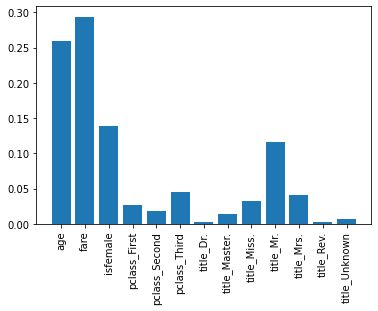

In [22]:
plt.bar(X.columns, rfc.feature_importances_)
plt.xticks(rotation=90);

### Hiperparametros

In [23]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc

In [24]:
criteria=['gini', 'entropy']
weight=['balanced', 'balanced_subsample']
features=['auto', 'sqrt', 'log2']


space={
    'n_estimators':hp.quniform('n_estimators', 10, 1000, 20),
    
    'criterion': hp.choice('criterion', criteria),
        
    'max_depth':hp.quniform('max_depth', 3, 16, 1),
    
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    
    'class_weight': hp.choice('class_weight', weight),
    
    'max_features': hp.choice('max_features', features)
}

In [25]:
def objetivo(space):
    
    modelo=RFC(
        n_estimators=int(space['n_estimators']),
        criterion=space['criterion'],
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        class_weight=space['class_weight'],
        max_features=space['max_features']
    )
        
    modelo.fit(X_train, y_train)
    
    y_pred=modelo.predict(X_test)
    
    acc_=acc(y_pred, y_test)
    f1_=f1(y_pred, y_test)
    auc_=auc(y_pred, y_test)
    
    return {'loss':-auc_, 'status':STATUS_OK}  # menos porque -minimizar=maximizar

In [26]:
best=fmin(fn=objetivo,
          space=space,
          algo=tpe.suggest,
          max_evals=150,
          trials=Trials())

best

100%|██████████| 150/150 [01:09<00:00,  2.16trial/s, best loss: -0.7873263888888888]


{'class_weight': 1,
 'criterion': 0,
 'max_depth': 14.0,
 'max_features': 2,
 'min_samples_split': 3.0,
 'n_estimators': 340.0}

In [27]:
rfc=RFC(n_estimators=int(best['n_estimators']),
        criterion=criteria[best['criterion']],
        max_depth=int(best['max_depth']),
        min_samples_split=int(best['min_samples_split']),
        class_weight=weight[best['class_weight']],
        max_features=features[best['max_features']])


rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

'Acc:', rfc.score(X_test, y_test), 'F1:', f1(y_pred, y_test)

('Acc:', 0.7703349282296651, 'F1:', 0.7209302325581396)

## Reentreno y guardado

In [28]:
import pickle

In [29]:
rfc=RFC(n_estimators=int(best['n_estimators']),
        criterion=criteria[best['criterion']],
        max_depth=int(best['max_depth']),
        min_samples_split=int(best['min_samples_split']),
        class_weight=weight[best['class_weight']],
        max_features=features[best['max_features']])


rfc.fit(X, y)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=14,
                       max_features='log2', min_samples_split=3,
                       n_estimators=340)

In [30]:
pickle.dump(rfc, open('modelo_rfc.pkl', 'wb'))  

## Carga y prediccion

In [31]:
rfc_cargado=pickle.load(open('modelo_rfc.pkl', 'rb'))

In [32]:
y_pred=rfc_cargado.predict(X_test)

'Acc:', rfc.score(X_test, y_test), 'F1:', f1(y_pred, y_test)

('Acc:', 0.9473684210526315, 'F1:', 0.9364161849710984)

In [33]:
X.head()

,age,fare,isfemale,pclass_First,pclass_Second,pclass_Third,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Rev.,title_Unknown
0,29.0000,211.3375,1,1,0,0,0,0,1,0,0,0,0
1,0.9167,151.5500,0,1,0,0,0,1,0,0,0,0,0
2,2.0000,151.5500,1,1,0,0,0,0,1,0,0,0,0
3,30.0000,151.5500,0,1,0,0,0,0,0,1,0,0,0
4,25.0000,151.5500,1,1,0,0,0,0,0,0,1,0,0


In [34]:
# se crea un pasajero ficticio


pasajero=dict(zip(X.columns, [25, 200, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]))

pasajero

{'age': 25,
 'fare': 200,
 'isfemale': 1,
 'pclass_First': 1,
 'pclass_Second': 0,
 'pclass_Third': 0,
 'title_Dr.': 0,
 'title_Master.': 0,
 'title_Miss.': 1,
 'title_Mr.': 0,
 'title_Mrs.': 0,
 'title_Rev.': 0,
 'title_Unknown': 0}

In [35]:
y_pred=rfc_cargado.predict([list(pasajero.values())])

y_prob=rfc_cargado.predict_proba([list(pasajero.values())])

print ('Etiqueta:', y_pred) 
print ()
print ('Probabilidad [0 , 1]:', y_prob[0])
print ()
print ('Prob supervivencia:', y_prob[0][1])

Etiqueta: [1]

Probabilidad [0 , 1]: [0.01425274 0.98574726]

Prob supervivencia: 0.9857472558401351


## Plot

In [36]:
tasa_media_super=np.mean(df.survived)*100
print ('Tasa media supervivencia: {:.2f}%'.format(tasa_media_super))

Tasa media supervivencia: 38.20%


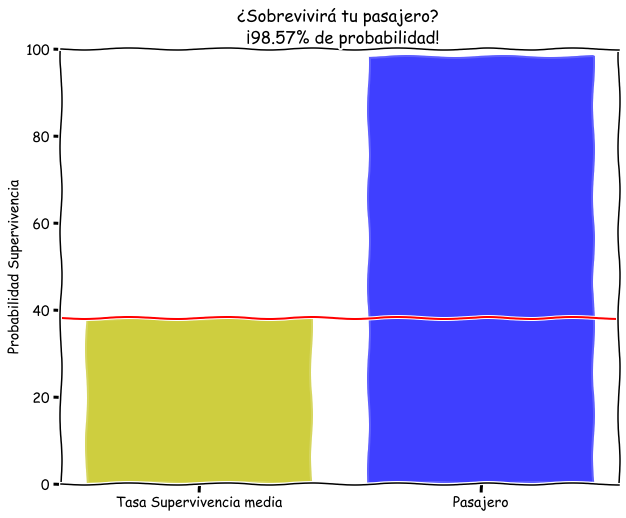

In [37]:
with plt.xkcd():
    plt.figure(figsize=(10,8))

    plt.bar(range(2),
            [tasa_media_super, y_prob[0][1]*100],
            align='center', 
            color=['y', 'b'], 
            alpha=0.5)

    plt.xticks(range(2), ['Tasa Supervivencia media', 'Pasajero'])

    plt.axhline(tasa_media_super, color='r')
    plt.ylim([0,100])
    plt.ylabel('Probabilidad Supervivencia')
    plt.title('¿Sobrevivirá tu pasajero? \n '+'¡{:.2f}% de probabilidad!'.format(y_prob[0][1]*100));

# Web-App (main.py)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


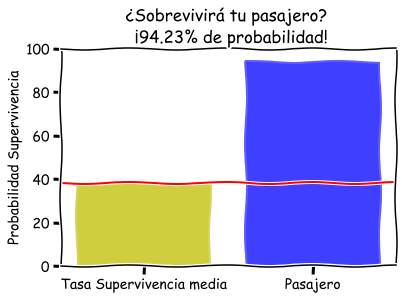

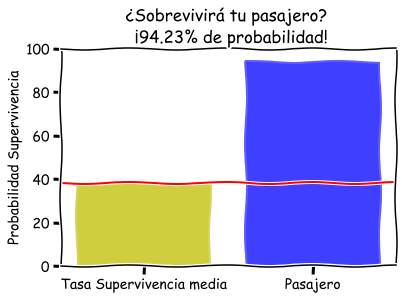

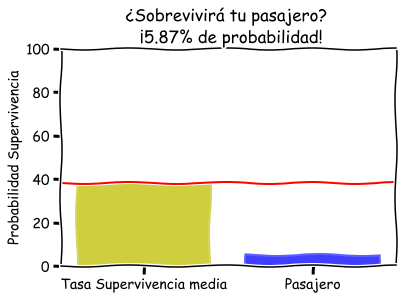

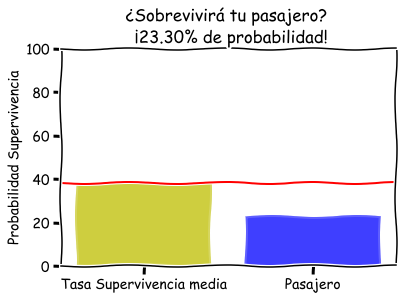

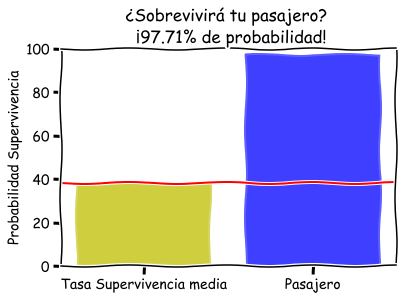

In [38]:
from flask import Flask
from flask import render_template
from flask import request
from flask import Markup

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import io
import os
import base64

import numpy as np
import pickle


# necesario en pythonanywhere
#PATH=os.path.dirname(os.path.abspath(__file__))

# inicializando variables
tasa_media=38.20


# modelo 
modelo=None


# flask app
app=Flask(__name__)



# antes del primer request...
@app.before_first_request
def startup():
    global modelo
    
    modelo=pickle.load(open('models/modelo_rfc.pkl', 'rb'))
    
    
    
# main app
@app.route("/", methods=['POST', 'GET'])
def main():
    
    if request.method=='POST':
        
        response={
            's_age': request.form['s_age'],
            's_fare': request.form['s_fare'],
            's_gender': 1 if request.form['s_gender']=='Female' else 0,
            's_pclass': request.form['s_pclass'],
            's_title': request.form['s_title']}
        
        # titulo
        title={'Dr':     [1, 0, 0, 0, 0, 0, 0],
               'Master': [0, 1, 0, 0, 0, 0, 0],
               'Miss':   [0, 0, 1, 0, 0, 0, 0],
               'Mr':     [0, 0, 0, 1, 0, 0, 0],
               'Mrs':    [0, 0, 0, 0, 1, 0, 0],
               'Rev':    [0, 0, 0, 0, 0, 1, 0],
               'Unknown':[0, 0, 0, 0, 0, 0, 1]}

            
        # clase
        p_class={'First':  [1, 0, 0],
                 'Second': [0, 1, 0],
                 'Third':  [0, 0, 1]}
            
        
        # pasajero
        pasajero=[[int(response['s_age']),          # edad
                   int(response['s_fare']),         # tarifa
                   response['s_gender']]+           # genero
                   p_class[response['s_pclass']]+   # clase    
                   title[response['s_title']]]      # titulo
        
        
        # prediccion
        y_prob=modelo.predict_proba(pasajero)
        
        
        # plot
        with plt.xkcd():
            plt.figure()
 
            plt.bar(range(2),[tasa_media, y_prob[0][1]*100],
                    align='center', color=['y', 'b'], alpha=0.5)
            
            plt.xticks(range(2), ['Tasa Supervivencia media', 'Pasajero'])
            plt.axhline(tasa_media, color='r')
            plt.ylim([0,100])
            plt.ylabel('Probabilidad Supervivencia')
            plt.title('¿Sobrevivirá tu pasajero? \n '+'¡{:.2f}% de probabilidad!'.format(y_prob[0][1]*100))
            # para sacar al html
            img=io.BytesIO()
            plt.savefig(img, format='png')
            img.seek(0)
            plot_url=base64.b64encode(img.getvalue()).decode()
            
        
        return render_template('index.html',
                               model_results='',
                               model_plot=Markup('<img src="data:image/png;base64,{}">'.format(plot_url)),
                               s_age=response['s_age'],
                               s_fare=response['s_fare'],
                               s_gender=request.form['s_gender'],
                               s_pclass=response['s_pclass'],
                               s_title=response['s_title'])
    
    else:
        # parametros por defecto
        return render_template('index.html',
                               model_results = '',
                               model_plot = '',
                               s_age=30,
                               s_fare=35,
                               s_gender='Female',
                               s_pclass='Second',
                               s_title='Mrs')

    

# solo en local
if __name__=='__main__':
    app.run(debug=False)
    